# In Class Exercise 3
Jack Yeung

In [56]:
library(tidyverse)

In [57]:
df <- read.csv('../data/owid-energy-data.csv') %>% drop_na()

In [58]:
head(df)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,⋯,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bulgaria,2009,BGR,7634737,107365072896,200.106,0.041,8.078,0.062,1.310,⋯,0.000,0.005,94.656,0.320,0.662,31.435,0.24,86.696,0.567,0.327
2,Bulgaria,2010,BGR,7592271,109045211136,199.971,0.123,24.367,0.185,5.269,⋯,0.022,0.020,187.487,1.229,1.891,89.565,0.68,249.095,1.481,0.894
3,Bulgaria,2011,BGR,7543128,109435363328,5.558,0.010,25.889,0.195,7.954,⋯,0.200,0.124,26.377,0.484,2.375,114.011,0.86,314.918,1.721,1.058
4,Bulgaria,2012,BGR,7488347,110261510144,399.988,0.781,130.387,0.976,9.348,⋯,1.679,1.000,41.784,0.972,3.348,162.920,1.22,447.044,2.626,1.569
5,Bulgaria,2013,BGR,7431169,109643522048,29.912,0.292,170.692,1.268,14.803,⋯,3.231,1.915,12.500,0.396,3.743,184.359,1.37,503.742,3.185,1.890
6,Bulgaria,2014,BGR,7372142,110703534080,-0.613,-0.008,171.004,1.261,27.129,⋯,2.685,1.609,-3.126,-0.139,3.605,180.409,1.33,488.957,2.835,1.704


In [59]:
nrow(df)

[1] 138

In [60]:
str(df)

'data.frame':	138 obs. of  129 variables:
 $ country                                     : chr  "Bulgaria" "Bulgaria" "Bulgaria" "Bulgaria" ...
 $ year                                        : int  2009 2010 2011 2012 2013 2014 2015 2016 2005 2006 ...
 $ iso_code                                    : chr  "BGR" "BGR" "BGR" "BGR" ...
 $ population                                  : num  7634737 7592271 7543128 7488347 7431169 ...
 $ gdp                                         : num  1.07e+11 1.09e+11 1.09e+11 1.10e+11 1.10e+11 ...
 $ biofuel_cons_change_pct                     : num  200.11 199.97 5.56 399.99 29.91 ...
 $ biofuel_cons_change_twh                     : num  0.041 0.123 0.01 0.781 0.292 -0.008 0.407 0.192 -0.329 0.179 ...
 $ biofuel_cons_per_capita                     : num  8.08 24.37 25.89 130.39 170.69 ...
 $ biofuel_consumption                         : num  0.062 0.185 0.195 0.976 1.268 ...
 $ biofuel_elec_per_capita                     : num  1.31 5.27 7.95 9.35 14.8 

## Respone plots

In [61]:
target <- 'coal_consumption'
predictor_1 <- 'renewables_consumption'
predictor_2 <- 'electricity_generation'

### Coal consumption based on renewable energy consumption

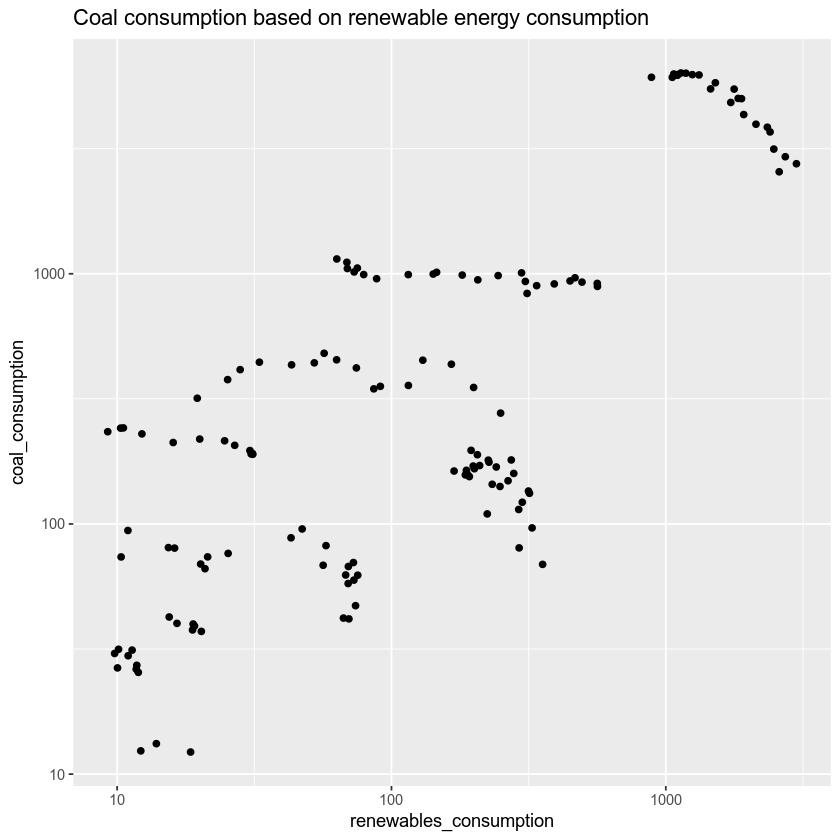

In [77]:
df |> group_by(.data[[predictor_1]]) |> 
    summarise(coal_consumption = mean(.data[[target]] )) |>
    ggplot() + geom_point(aes(x = .data[[predictor_1]], y=.data[[target]])) + scale_x_log10() + scale_y_log10() +
    labs(title = "Coal consumption based on renewable energy consumption")

Coal Consumption based on electricity generation

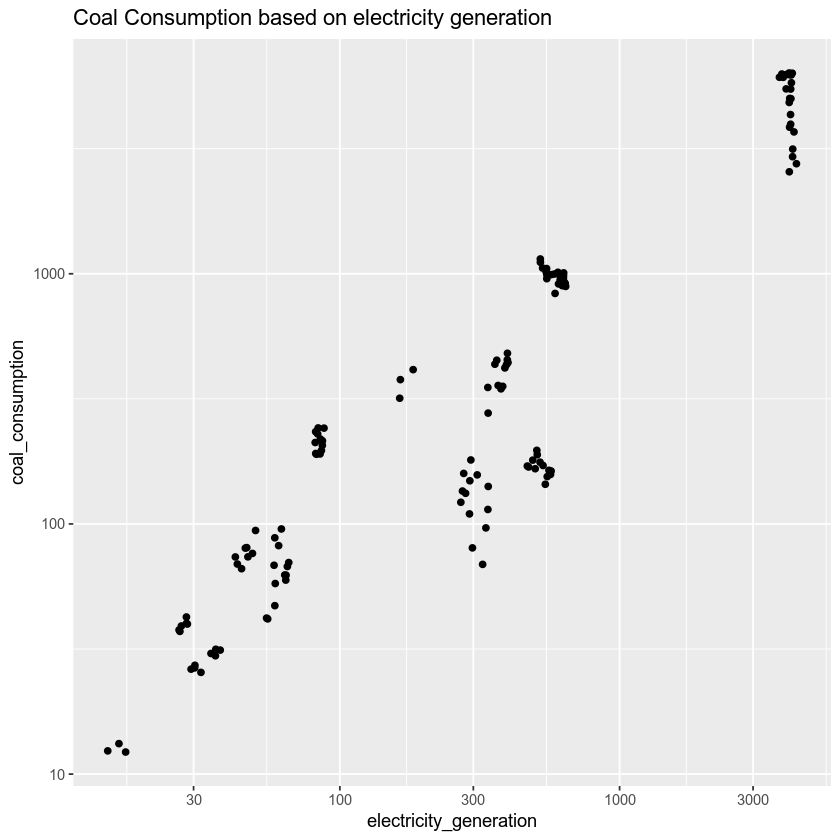

In [78]:
df |>    
    group_by(.data[[predictor_2]]) |>
    summarise(coal_consumption = mean(.data[[target]] )) |>
    ggplot() + geom_point(aes(x = .data[[predictor_2]], y=.data[[target]])) + scale_x_log10() + scale_y_log10() +
    labs(title = "Coal Consumption based on electricity generation")

## Co plots

### Plotting Coal consumption against electricity energy for every group of total renewable energy

In [69]:
df |> 
    mutate(predictor_1_binned = log(.data[[predictor_1]])) |> 
    pull(predictor_1_binned) |> 
    range(na.rm = TRUE)
    

[1] 2.223758 8.004050

`summarise()` has grouped output by 'electricity_generation'. You can override
using the `.groups` argument.


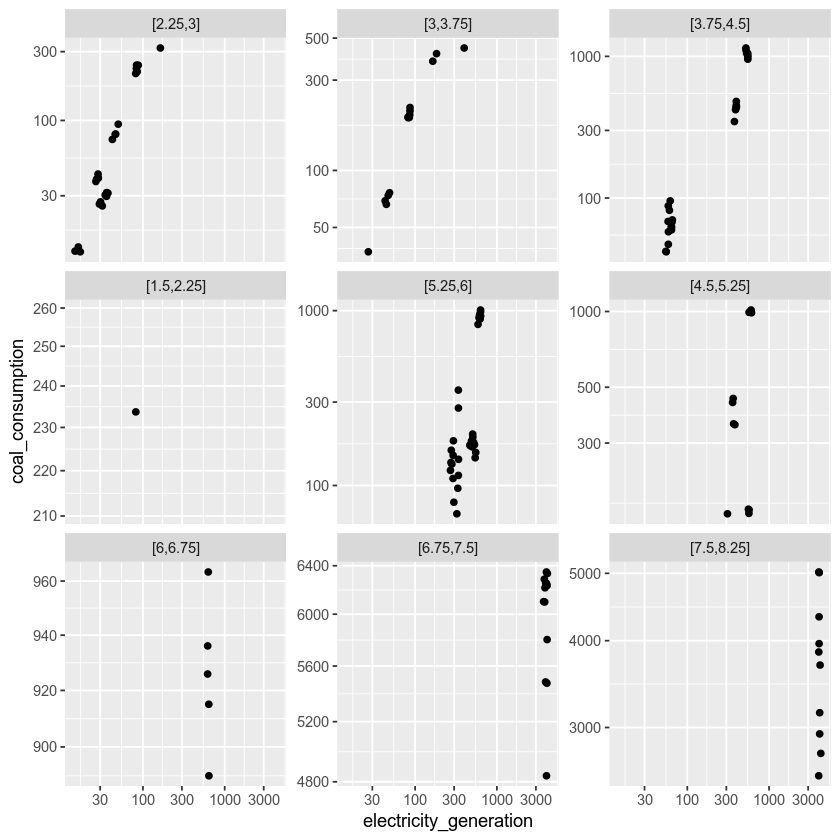

In [72]:
df |>    
    group_by(.data[[predictor_2]], .data[[predictor_1]]) |>
    summarise(coal_consumption = mean(.data[[target]])) |>
    mutate(predictor_1_binned = cut_width(log(.data[[predictor_1]]), width = .75, boundary = 0)) |>
    ggplot() + 
      geom_point(aes(x = .data[[predictor_2]], y=.data[[target]])) +
      facet_wrap(~ predictor_1_binned, scales = "free_y") + 
      scale_x_log10()+ 
      scale_y_log10()


### Plotting Coal consumption against Renewable energy for every group of electricity generation

In [68]:
df |> 
    mutate(predictor_2_binned = log(.data[[predictor_2]])) |> 
    pull(predictor_2_binned) |> 
    range(na.rm = TRUE)

[1] 2.694627 8.363321

`summarise()` has grouped output by 'electricity_generation'. You can override
using the `.groups` argument.


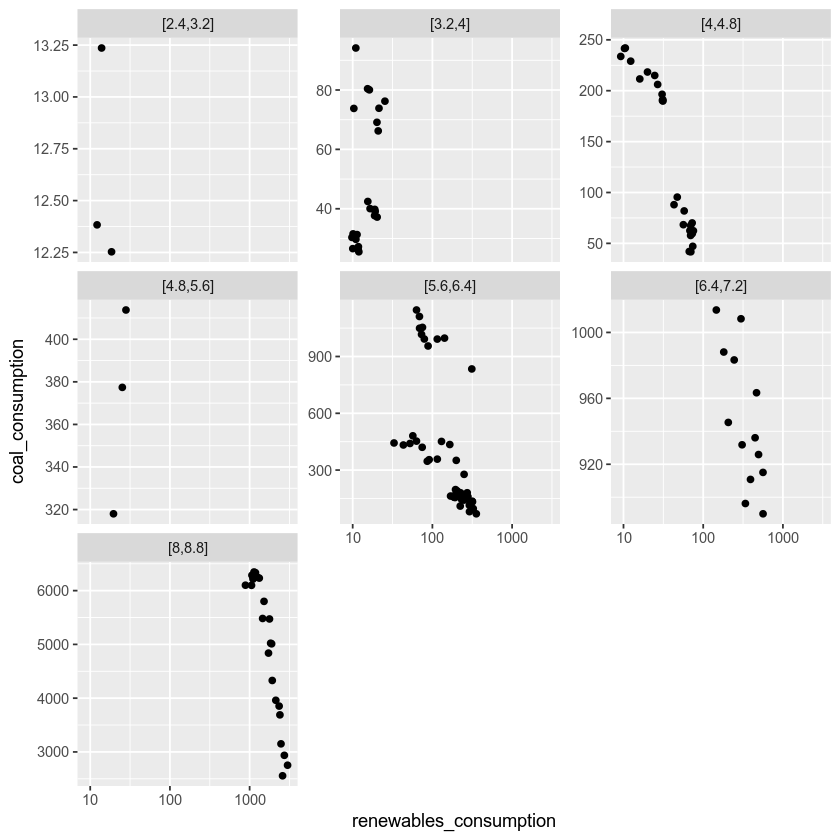

In [74]:

df |>    
    group_by(.data[[predictor_2]], .data[[predictor_1]]) |>
    summarise(coal_consumption = mean(.data[[target]])) |>
    mutate(predictor_2_binned = cut_width(log(.data[[predictor_2]]), width = .8, boundary = 0)) |>
    ggplot() + 
      geom_point(aes(x = .data[[predictor_1]], y=.data[[target]])) +
      facet_wrap(~ predictor_2_binned, scales = "free_y") + 
      scale_x_log10() 
      # scale_y_log10()

## Describing Relationships 


Two variables relationships
For both predictor features of renewable energy production and total electricity consumpriton displayed positively corelation, I found this suprising for renewable energy consumption. My thinking was that although large companies are likely to consume large amounts of both coal and renewable energy, my intuition belieevd that this would be less linear for companies that are attempting to make the switch to renewable energies



Coplots
I would expect there to be some sort of interaction based on the two predictor variables.

- The first plot which plotted Coal consumption against electricty generation for every group of renewable consumption, I expected for the facet plots for the countries with higher renewable consumption to show a weaker relationship between electicity generation and coal consumption. However the plots seem to show the opposite in which the relationship between electrical generation and coal becomes stronger for countries with more renewable energy consumption

- The second plot was on Coal consumption against Renewable energy for every group of electricity generation. We can observe that the facet plots for countries with larger energy consumption, show a stronger negative relationship between renewable consumption. Indicating that companies that produce consume more energy reduce there coal consumption at a stronger rate relative to their renewable consumption 


### Model Selection

I think it would make sense to select only one year before doing modeling such that we can observe the relationships between countries without a temporal confounding impact. After this is done it would make sense to use a loess function to fit a linear regression line for each of these facets, giving us more insight into the actual p values and statistic strength. 
